
# This is the first part of the project "Precipitation Forecast", which has four components. 

Our aim in this project is to develop a simple precipitation forecast model based on prevailing air temperature, relative humidity, and sea level pressure. Precipitation is one of the most difficult field to forecast in weather/climate models because of its large spatiotemporal variability. The aim in this project is to develop a simple regression model that can show some skills in capturing certain aspect of precipitation and make some decent forecast over the region of California. Because the training data were derived from the California region, the model works the best for this region. Although forecasting in other cities is possible, the prediction model might show lesser skills. This project is neither a precipitation forecast model per se nor a replacement for more comprehensive weather models. This project only aims to demonstrate a proof of concept of a simple forecast model using machine learning/regression models. My conviction is that an effective forecast model should be simple to use and use as little parameter as possible to make a reasonable forecast. I always choose simplicity over complexity whenever possible. 

# Part 1
## This python notebook demonstrates how to open NetCDF data and visualize the content. Data visualization is the first step of any data analysis project. Without understanding the details of the data, we cannot make a good prediction model.


* We use ERA5 data in this project. ERA5 data were downloaded from the following ECMWF portal:

surface data:
#https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview

pressure level data
#https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-pressure-levels?tab=overview

* all data are hourly data 
* The unit of tp is m (meter). It is the hourly instantaneous precipitation. To get daily 24-hr precip, sum tp(dn,t1) to tp(dn+1,t1) where d is day and t is time
* All data are from 00:00 to 23:00 hourly
* Total data points along time dimension = 24*365 = 8760 (entire year of 2022)



In [1]:
# Open the first NetCDF file (surface data) containing t2m (2m air temp), msl (sea level pressure), and tp (total precipitation) and examine the content
import xarray as xr # xarray best handles the n-d arrays in python
import pandas as pd # pandas makes life so much easy

ds1 = xr.open_dataset('./Data/adaptor.mars.internal-1694206363.8933547-24585-11-8802618f-5def-422e-a4f5-039fe7b81380.nc')
ds1

<xarray.Dataset>
Dimensions:    (longitude: 29, latitude: 20, time: 8760)
Coordinates:
  * longitude  (longitude) float32 -121.8 -121.5 -121.2 ... -115.2 -115.0 -114.8
  * latitude   (latitude) float32 37.3 37.05 36.8 36.55 ... 33.05 32.8 32.55
  * time       (time) datetime64[ns] 2022-01-01 ... 2022-12-31T23:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    msl        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-09-08 20:54:56 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [3]:
# Open the second NetCDF file (pressure level data) containing relative humidity (r) at the lowest model level (1000 hPa) and examine the content
ds2 = xr.open_dataset('./Data/adaptor.mars.internal-1694206982.4222376-12566-4-f578be68-688e-4dcb-88b8-8bc8fe08522c.nc')
ds2

<xarray.Dataset>
Dimensions:    (longitude: 29, latitude: 20, time: 8760)
Coordinates:
  * longitude  (longitude) float32 -121.8 -121.5 -121.2 ... -115.2 -115.0 -114.8
  * latitude   (latitude) float32 37.3 37.05 36.8 36.55 ... 33.05 32.8 32.55
  * time       (time) datetime64[ns] 2022-01-01 ... 2022-12-31T23:00:00
Data variables:
    r          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-09-08 21:03:28 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [4]:
# Convert the variable of interest from ds1 to a Pandas DataFrame
df1 = ds1[['msl', 't2m', 'tp']].to_dataframe()
df1


msl         t2m   tp
time                latitude  longitude                                
2022-01-01 00:00:00 37.299999 -121.75    101230.718750  282.055115  0.0
                              -121.50    101214.593750  282.050812  0.0
                              -121.25    101196.835938  282.966736  0.0
                              -121.00    101189.406250  284.348175  0.0
                              -120.75    101163.625000  284.371826  0.0
...                                                ...         ...  ...
2022-12-31 23:00:00 32.549999 -115.75    101183.312500  293.860199  0.0
                              -115.50    101220.765625  293.862335  0.0
                              -115.25    101241.421875  294.191315  0.0
                              -115.00    101236.218750  294.763245  0.0
                              -114.75    101233.320312  294.869659  0.0

[5080800 rows x 3 columns]

In [5]:
# Convert the variable of interest from ds2 to a Pandas DataFrame
df2 = ds2[['r']].to_dataframe()
df2

r
time                latitude  longitude           
2022-01-01 00:00:00 37.299999 -121.75    60.812889
                              -121.50    63.179852
                              -121.25    62.960621
                              -121.00    62.878872
                              -120.75    63.313622
...                                            ...
2022-12-31 23:00:00 32.549999 -115.75    47.298523
                              -115.50    63.778095
                              -115.25    62.670788
                              -115.00    56.030655
                              -114.75    53.425877

[5080800 rows x 1 columns]

In [6]:
# now combine the two dataframes together columnwise

combined_df = pd.concat([df1, df2], axis=1) # axis = 1 means along column
combined_df

msl         t2m   tp  \
time                latitude  longitude                                   
2022-01-01 00:00:00 37.299999 -121.75    101230.718750  282.055115  0.0   
                              -121.50    101214.593750  282.050812  0.0   
                              -121.25    101196.835938  282.966736  0.0   
                              -121.00    101189.406250  284.348175  0.0   
                              -120.75    101163.625000  284.371826  0.0   
...                                                ...         ...  ...   
2022-12-31 23:00:00 32.549999 -115.75    101183.312500  293.860199  0.0   
                              -115.50    101220.765625  293.862335  0.0   
                              -115.25    101241.421875  294.191315  0.0   
                              -115.00    101236.218750  294.763245  0.0   
                              -114.75    101233.320312  294.869659  0.0   

                                                 r  
time                latitude  longitude             
2022-01-01 00:00:00 37.299999 -121.75    60.812889  
                              -121.50    63.179852  
                              -121.25    62.960621  
                              -121.00    62.878872  
                              -120.75    63.313622  
...                                            ...  
2022-12-31 23:00:00 32.549999 -115.75    47.298523  
                              -115.50    63.778095  
                              -115.25    62.670788  
                              -115.00    56.030655  
                              -114.75    53.425877  

[5080800 rows x 4 columns]

In [7]:
# Data wrangling 

# convert unit of tp from meter to mm
combined_df['tp'] = combined_df['tp'] * 1000

# also replace zero values by NaN
import numpy as np
combined_df['tp'] = combined_df['tp'].replace(0, np.nan)

# remove all rows containing NaN, regression model doesn't work with NaNs
combined_df.dropna(subset=['tp'], inplace=True)

# now convert unit of temperature from K to C
combined_df['t2m'] = combined_df['t2m'] - 273.15

# convert unit of msl from Pa to hPa
combined_df['msl'] = combined_df['msl'] / 100

combined_df



msl        t2m        tp  \
time                latitude  longitude                                     
2022-01-01 00:00:00 37.299999 -120.25    1011.052979  10.325256  0.000138   
                              -120.00    1010.648804   9.514648  0.000276   
                              -119.75    1010.389465   7.061401  0.003729   
                              -119.50    1010.182190   3.176178  0.023199   
                              -119.25    1009.831482  -1.607758  0.033832   
...                                              ...        ...       ...   
2022-12-31 23:00:00 32.549999 -117.00    1015.411560  14.265289  0.144303   
                              -116.75    1015.324585  13.514923  0.304349   
                              -116.50    1014.964233  11.247650  0.240138   
                              -116.25    1013.471497  13.237549  0.076087   
                              -116.00    1012.240295  17.490448  0.005385   

                                                 r  
time                latitude  longitude             
2022-01-01 00:00:00 37.299999 -120.25    69.329498  
                              -120.00    73.911079  
                              -119.75    77.565567  
                              -119.50    83.365936  
                              -119.25    89.745964  
...                                            ...  
2022-12-31 23:00:00 32.549999 -117.00    89.337227  
                              -116.75    84.501114  
                              -116.50    85.162521  
                              -116.25    71.859962  
                              -116.00    46.631538  

[821428 rows x 4 columns]

In [8]:

# The variables time, latitude, and longitude are stored as index not as columns, it will cause problems later, check indices
combined_df.index


MultiIndex([('2022-01-01 00:00:00', 37.29999923706055, -120.25),
            ('2022-01-01 00:00:00', 37.29999923706055,  -120.0),
            ('2022-01-01 00:00:00', 37.29999923706055, -119.75),
            ('2022-01-01 00:00:00', 37.29999923706055,  -119.5),
            ('2022-01-01 00:00:00', 37.29999923706055, -119.25),
            ('2022-01-01 00:00:00', 37.29999923706055,  -119.0),
            ('2022-01-01 00:00:00', 37.29999923706055, -118.75),
            ('2022-01-01 00:00:00', 37.29999923706055,  -118.5),
            ('2022-01-01 00:00:00', 37.29999923706055, -118.25),
            ('2022-01-01 00:00:00', 37.29999923706055,  -118.0),
            ...
            ('2022-12-31 23:00:00', 32.54999923706055, -118.25),
            ('2022-12-31 23:00:00', 32.54999923706055,  -118.0),
            ('2022-12-31 23:00:00', 32.54999923706055, -117.75),
            ('2022-12-31 23:00:00', 32.54999923706055,  -117.5),
            ('2022-12-31 23:00:00', 32.54999923706055, -117.25),
         

In [9]:
# The variables time, latitude, and longitude are stored as indices not as columns. Therefore, we should first turn these variables into regular columns using reset_index

combined_df.reset_index(inplace=True)
combined_df

,time,latitude,longitude,msl,t2m,tp,r
0,2022-01-01 00:00:00,37.299999,-120.25,1011.052979,10.325256,0.000138,69.329498
1,2022-01-01 00:00:00,37.299999,-120.00,1010.648804,9.514648,0.000276,73.911079
2,2022-01-01 00:00:00,37.299999,-119.75,1010.389465,7.061401,0.003729,77.565567
3,2022-01-01 00:00:00,37.299999,-119.50,1010.182190,3.176178,0.023199,83.365936
4,2022-01-01 00:00:00,37.299999,-119.25,1009.831482,-1.607758,0.033832,89.745964
...,...,...,...,...,...,...,...
821423,2022-12-31 23:00:00,32.549999,-117.00,1015.411560,14.265289,0.144303,89.337227
821424,2022-12-31 23:00:00,32.549999,-116.75,1015.324585,13.514923,0.304349,84.501114
821425,2022-12-31 23:00:00,32.549999,-116.50,1014.964233,11.247650,0.240138,85.162521
821426,2022-12-31 23:00:00,32.549999,-116.25,1013.471497,13.237549,0.076087,71.859962


In [10]:
# Examine the maximum values of each variables to have a feel of the data range. They will also be needed for plotting histograms later. 
max_tp = combined_df['tp'].max()
max_r = combined_df['r'].max()
max_msl = combined_df['msl'].max()
max_t2m = combined_df['t2m'].max()

print(max_tp)
print(max_r)
print(max_msl)
print(max_t2m)

9.049415588378906
119.27356719970703
1035.5242919921875
45.59539794921875


The results of the previous cells look reasonable. 
* The maximum precipitation in an hour is about 9 mm, 
* The relative humidity is about 120%
* The sea level pressure is about 1035 hPa (remember the normal atmospheric pressure on the surface is about 1000 hPa)
* The maximum temperature is about 45 C, which is also reasonable. 

**This is how we verify the data**

In [12]:
# msl data is unique because the lowest value is not zero
min_msl = combined_df['msl'].min()
min_msl

991.5279541015625

# Now we will plot histogram, scatter plot, and timeseries of the data variables

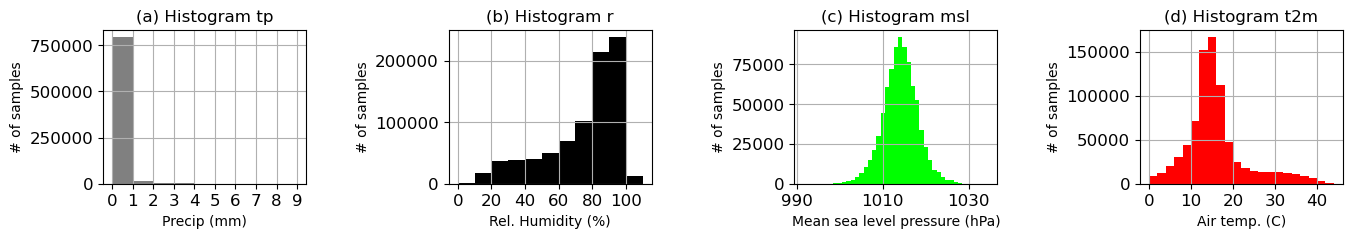

In [174]:


# Now plot histograms 

import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 2))
plt.subplots_adjust(wspace=0.7)  # Adjust the width space between subplots


bin_tp = np.arange(0, 10, 1)
ax1.hist(combined_df['tp'], bins=bin_tp, color=[0.5, 0.5, 0.5])
ax1.set_title('(a) Histogram tp')
ax1.set_xlabel('Precip (mm)')
ax1.set_ylabel('# of samples')
ax1.tick_params(axis='both', labelsize=12)
ax1.set_xticks(np.arange(0, 10, 1))
ax1.grid(True)

bin_r = np.arange(0, 120, 10)
ax2.hist(combined_df['r'], bins=bin_r, color=[0, 0, 0])
ax2.set_title('(b) Histogram r')
ax2.set_xlabel('Rel. Humidity (%)')
ax2.set_ylabel('# of samples')
ax2.tick_params(axis='both', labelsize=12)
ax2.set_xticks(np.arange(0, 120, 20))
ax2.grid(True)

bin_msl = np.arange(combined_df['msl'].min(), combined_df['msl'].max(), 1)
ax3.hist(combined_df['msl'], bins=bin_msl, color=[0, 1, 0])
ax3.set_title('(c) Histogram msl')
ax3.set_xlabel('Mean sea level pressure (hPa)')
ax3.set_ylabel('# of samples')
ax3.tick_params(axis='both', labelsize=12)
ax3.set_xticks(np.arange(990, 1040, 20))
ax3.grid(True)

bin_t2m = np.arange(0, 46, 2)
ax4.hist(combined_df['t2m'], bins=bin_t2m, color=['r'])
ax4.set_title('(d) Histogram t2m')
ax4.set_xlabel('Air temp. (C)')
ax4.set_ylabel('# of samples')
ax4.tick_params(axis='both', labelsize=12)
ax4.set_xticks(np.arange(0, 46, 10))
ax4.grid(True)

plt.savefig('histograms.png', bbox_inches='tight', dpi=300)



**Notice above how the distribution are different for each variable. The msl and t2m more or less look like normally distributed but the relative humidity and total precipitation are highly skewed, as expected.**

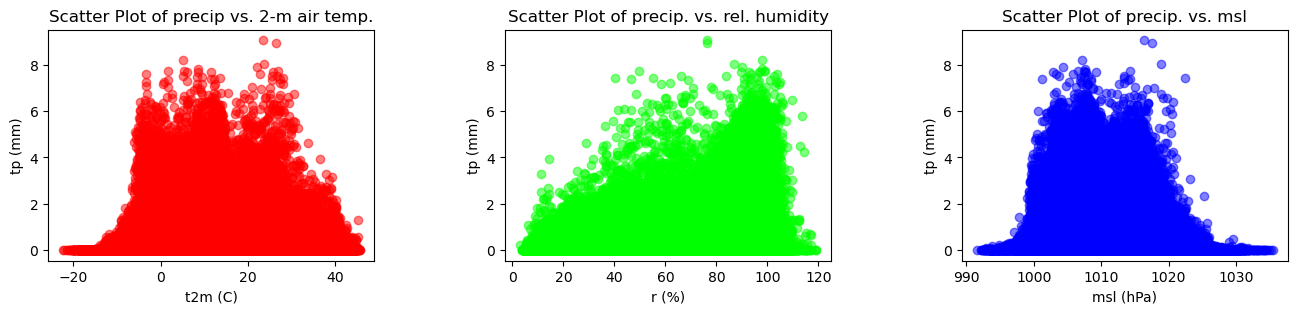

In [173]:
# Now create scatter plots

import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 3))
plt.subplots_adjust(wspace=0.4)  # Adjust the width space between subplots


# Create a scatter plot
ax1.scatter(combined_df['t2m'], combined_df['tp'], alpha=0.5, color=[1, 0, 0])  # alpha controls transparency (optional)
ax1.set_xlabel('t2m (C)')
ax1.set_ylabel('tp (mm)')
ax1.set_title('Scatter Plot of precip vs. 2-m air temp.')

ax2.scatter(combined_df['r'], combined_df['tp'], alpha=0.5, color=[0, 1, 0])  # alpha controls transparency (optional)
ax2.set_xlabel('r (%)')
ax2.set_ylabel('tp (mm)')
ax2.set_title('Scatter Plot of precip. vs. rel. humidity')

ax3.scatter(combined_df['msl'], combined_df['tp'], alpha=0.5, color=[0, 0, 1])  # alpha controls transparency (optional)
ax3.set_xlabel('msl (hPa)')
ax3.set_ylabel('tp (mm)')
ax3.set_title('Scatter Plot of precip. vs. msl')

plt.savefig('scatter.png', bbox_inches='tight', dpi=300)


### Now we will plot the timeseries. Plotting timeseries directly from a multiple-indexed dataframe is not recommened because to plot the timeseries we have to average the variables spatially along lat and lon dimensions first. So first we will calculate the spatial-average of the variables over the entire California using numpy. Remember the original data corresponds to a bounding box containing California: [37.42,-121.75],[32.55,-114.52]


In [14]:
import numpy as np

t2m = ds1.t2m 
# Calculate the mean along the first axis (axis=0)
t2m_av_lon = np.nanmean(t2m, axis=2) # first index is time, data dimension is time*lat*long (3*6*2)
t2m_av_lon_lat = np.nanmean(t2m_av_lon, axis=1)
t2m_av_lon_lat

msl = ds1.msl
# Calculate the mean along the first axis (axis=0)
msl_av_lon = np.nanmean(msl, axis=2) # first index is time, data dimension is time*lat*long (3*6*2)
msl_av_lon_lat = np.nanmean(msl_av_lon, axis=1)
msl_av_lon_lat

r = ds2.r 
# Calculate the mean along the first axis (axis=0)
r_av_lon = np.nanmean(r, axis=2) # first index is time, data dimension is time*lat*long (3*6*2)
r_av_lon_lat = np.nanmean(r_av_lon, axis=1)
r_av_lon_lat

tp = ds1.tp 
# Calculate the mean along the first axis (axis=0)
tp_av_lon = np.nanmean(tp, axis=2) # first index is time, data dimension is time*lat*long (3*6*2)
tp_av_lon_lat = np.nanmean(tp_av_lon, axis=1)


np.shape(tp_av_lon_lat)


(8760,)

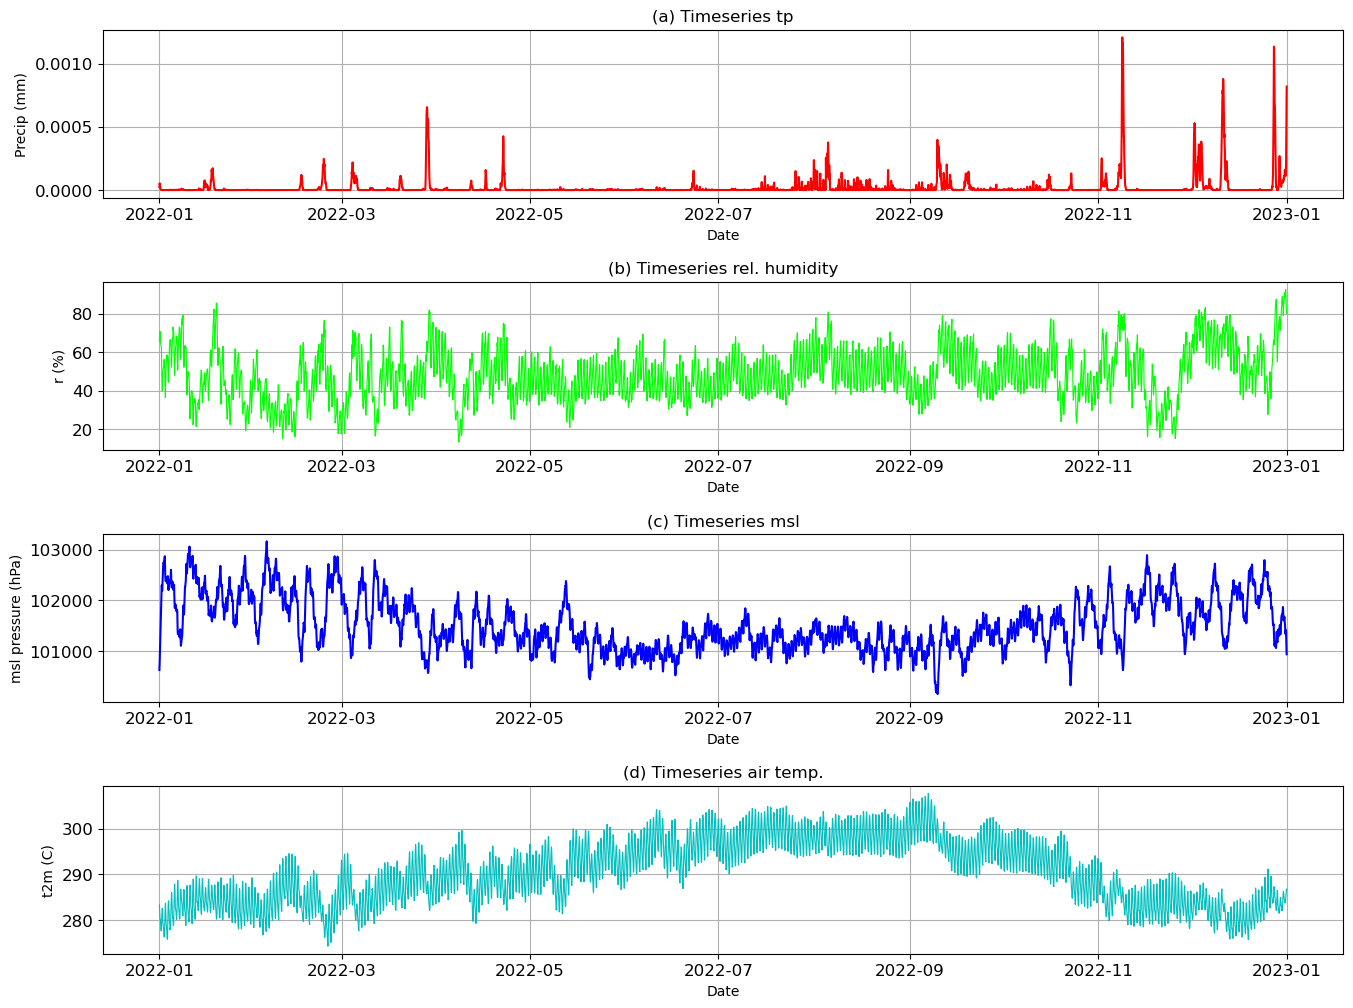

In [15]:
# Now lets plot the timeseries from the sptially-averaged data

import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(16, 12))
plt.subplots_adjust(hspace=0.5)

ax1.plot(ds1.time, tp_av_lon_lat, color=[1, 0, 0])
ax1.set_title('(a) Timeseries tp')
ax1.set_xlabel('Date')
ax1.set_ylabel('Precip (mm)')
ax1.tick_params(axis='both', labelsize=12)
ax1.grid(True)

ax2.plot(ds1.time, r_av_lon_lat, color=[0, 1, 0], linewidth=0.8)
ax2.set_title('(b) Timeseries rel. humidity')
ax2.set_xlabel('Date')
ax2.set_ylabel('r (%)')
ax2.tick_params(axis='both', labelsize=12)
ax2.grid(True)

ax3.plot(ds1.time, msl_av_lon_lat, color=[0, 0, 1])
ax3.set_title('(c) Timeseries msl')
ax3.set_xlabel('Date')
ax3.set_ylabel('msl pressure (hPa)')
ax3.tick_params(axis='both', labelsize=12)
ax3.grid(True)

ax4.plot(ds1.time, t2m_av_lon_lat, color='c', linewidth=0.8)
ax4.set_title('(d) Timeseries air temp.')
ax4.set_xlabel('Date')
ax4.set_ylabel('t2m (C)')
ax4.tick_params(axis='both', labelsize=12)
ax4.grid(True)

plt.savefig('timeseries.png', bbox_inches='tight', dpi=300)



### Pay attention to the above timeseries. What do you see? Are they as you would expect? Are y-axis values reasonable? Do you see any prominent patterns? 

### This ends the data visualization part. Next we will develop regression model to predict precipitation from the three selected independent  variables (t2m, r, msl). 